# How to Gather Personal Playlist Data from Spotify API

Spotify API: https://developer.spotify.com/documentation/web-api/reference/tracks/

Now that we have our Spotify credentials...
I used this code from https://github.com/sejaldua/lyrical-sentiment-analysis/blob/master/.ipynb_checkpoints/public_code-checkpoint.ipynb

In [107]:
#!pip install spotipy
import spotipy as sp
import numpy
from spotipy.oauth2 import SpotifyClientCredentials


username='izzy730'
client_id = '64cb58457d8a44e98b93b1761b82be6d'
client_secret = '03500ec43fef4db6933523d4d5b43304'
redirecturi='izzys-personal-playlist://callback'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

def get_features_for_playlist(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    
    #print(json.dumps(results, indent=4))               # uncomment this if you want to visualize the JSON structure
    
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    #plists[playlist_name]['artist'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []

    for track in results['tracks']['items']:
        
        # print(json.dumps(track, indent=4))              # DEBUG STATEMENT
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        #artist = track['track']['artists']
        
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)
        #plists[playlist_name]['artist'].append(artist)
        

        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])
    
uris = ['spotify:playlist:37i9dQZF1DXaMu9xyX1HzK', 'spotify:playlist:37i9dQZF1EtkXRUBe6Gwsv', 'spotify:playlist:37i9dQZF1EjsoXeGR7MZ0Q']
for uri in uris:
        get_features_for_playlist(uri)

print(plists)

I Like Me Better
Without Me
Sucker
Beautiful People (feat. Khalid)
Youngblood
thank u, next
Tequila
Someone You Loved
Beautiful (feat. Camila Cabello)
Happier
7 rings
It's You
The Middle
Señorita
Dancing With A Stranger (with Normani)
Let Me Go (with Alesso, Florida Georgia Line & watt)
You Need To Calm Down
The Bones
Circles
Sit Still, Look Pretty
Trampoline (with ZAYN)
Blank Space
Girls Like You (feat. Cardi B)
Sunflower - Spider-Man: Into the Spider-Verse
Little Do You Know
Scars To Your Beautiful
Treat You Better
Say You Won't Let Go
Please Don't Go
Classic
Sweet but Psycho
YOUTH
Meant to Be (feat. Florida Georgia Line)
Me And My Broken Heart
Story of My Life
Sorry Not Sorry
Starving
Delicate
no tears left to cry
Drag Me Down
High Hopes
Shout Out to My Ex
There's Nothing Holdin' Me Back
One Thing Right
1950
Young Dumb & Broke
Stay
Lucid Dreams
I'll Be There
Closer
Love Lies (with Normani)
Mine
Better Now
Good as Hell
Don't Call Me Up
FRIENDS
Never Be the Same
Attention
PILLOWTALK
H

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Best of the Decade For You
ACOUSTICNESS | median: 0.117 | mean: 0.22406410000000002
DANCEABILITY | median: 0.682 | mean: 0.6601300000000001
ENERGY | median: 0.655 | mean: 0.625035
INSTRUMENTALNESS | median: 0.0 | mean: 0.0013425671999999999
LIVENESS | median: 0.121 | mean: 0.156528
LOUDNESS | median: -5.5865 | mean: -5.831379999999999
SPEECHINESS | median: 0.055349999999999996 | mean: 0.088845
TEMPO | median: 108.011 | mean: 112.44702000000001
VALENCE | median: 0.4685 | mean: 0.485831
POPULARITY | median: nan | mean: nan
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Your Top Songs 2019
ACOUSTICNESS | median: 0.167 | mean: 0.255446558
DANCEABILITY | median: 0.674 | mean: 0.65664
ENERGY | median: 0.6425000000000001 | mean: 0.62054
INSTRUMENTALNESS | median: 1.3205e-05 | mean: 0.05395994830000001
LIVENESS | median: 0.118 | mean: 0.17697
LOUDNESS | median: -6.9055 | mean: -7.38054
SPEECHINESS | median: 0.0759499999

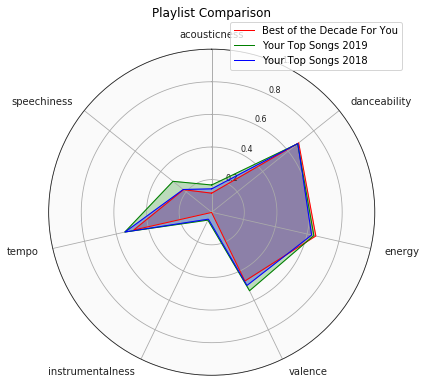

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# manually inspect all of the values to determine whether the median or mean is a better metric to plot
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    

labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
num_vars = len(labels)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each playlist on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), 
              np.median(plists[playlist]['speechiness'])]
    # tempo values typically range from 50-220, so I divided by 220 to get a number between 0 and 1
    values[-2] = values[-2]/220
    # speechiness values values are highly concentrated between 0 and 0.25-ish, so I multiplied by 4. Adjust this if needed
    values[-1] = values[-1]*4
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each additional playlist to the chart.
add_to_radar('Best of the Decade For You', 'red')
add_to_radar('Your Top Songs 2019', 'green')
add_to_radar('Your Top Songs 2018', 'blue')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

#Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

fig.savefig('playlist_comp.png')

## Data Formatting and Cleaning

In [66]:
izzy_df = pd.DataFrame(plists)
izzy_df.head(10)

,Best of the Decade For You,Your Top Songs 2019,Your Top Songs 2018
acousticness,"[0.535, 0.124, 0.297, 0.0427, 0.0169, 0.751, 0...","[0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7...","[0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956..."
danceability,"[0.752, 0.64, 0.752, 0.842, 0.596, 0.501, 0.71...","[0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905...","[0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4..."
energy,"[0.505, 0.648, 0.488, 0.734, 0.854, 0.405, 0.6...","[0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389...","[0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4..."
instrumentalness,"[2.55e-06, 0, 9.11e-06, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0...","[0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0..."
liveness,"[0.104, 0.0802, 0.0936, 0.106, 0.124, 0.105, 0...","[0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0...","[0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1..."
loudness,"[-7.621, -8.113, -7.05, -5.065, -5.114, -5.679...","[-11.713, -7.761, -10.027, -4.694, -8.623, -8....","[-6.878, -6.471, -9.419, -3.627, -5.858, -5.62..."
name,"[I Like Me Better, Beautiful People (feat. Kha...","[MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),...","[Let Me Down Easy, Nice For What, Paris in the..."
popularity,[],[],[]
speechiness,"[0.253, 0.187, 0.0705, 0.0588, 0.463, 0.0319, ...","[0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,...","[0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044..."
tempo,"[91.97, 92.977, 136.041, 137.958, 120.274, 109...","[123.984, 115.989, 109.492, 160.075, 115.987, ...","[139.01, 93.35, 76.309, 125.854, 144.48, 143.9..."


In [67]:
bestofdecade_df = izzy_df['Best of the Decade For You']
izzy2019_df = izzy_df['Your Top Songs 2019']
izzy2018_df = izzy_df['Your Top Songs 2018']

In [68]:
bestofdecade_df = pd.DataFrame(bestofdecade_df)
bestofdecade_df

,Best of the Decade For You
acousticness,"[0.535, 0.124, 0.297, 0.0427, 0.0169, 0.751, 0..."
danceability,"[0.752, 0.64, 0.752, 0.842, 0.596, 0.501, 0.71..."
energy,"[0.505, 0.648, 0.488, 0.734, 0.854, 0.405, 0.6..."
instrumentalness,"[2.55e-06, 0, 9.11e-06, 0, 0, 0, 0, 0, 0, 0, 0..."
liveness,"[0.104, 0.0802, 0.0936, 0.106, 0.124, 0.105, 0..."
loudness,"[-7.621, -8.113, -7.05, -5.065, -5.114, -5.679..."
name,"[I Like Me Better, Beautiful People (feat. Kha..."
popularity,[]
speechiness,"[0.253, 0.187, 0.0705, 0.0588, 0.463, 0.0319, ..."
tempo,"[91.97, 92.977, 136.041, 137.958, 120.274, 109..."


In [69]:
bestofdecade_df.reset_index(level=0, inplace=True)
bestofdecade_df

,index,Best of the Decade For You
0,acousticness,"[0.535, 0.124, 0.297, 0.0427, 0.0169, 0.751, 0..."
1,danceability,"[0.752, 0.64, 0.752, 0.842, 0.596, 0.501, 0.71..."
2,energy,"[0.505, 0.648, 0.488, 0.734, 0.854, 0.405, 0.6..."
3,instrumentalness,"[2.55e-06, 0, 9.11e-06, 0, 0, 0, 0, 0, 0, 0, 0..."
4,liveness,"[0.104, 0.0802, 0.0936, 0.106, 0.124, 0.105, 0..."
5,loudness,"[-7.621, -8.113, -7.05, -5.065, -5.114, -5.679..."
6,name,"[I Like Me Better, Beautiful People (feat. Kha..."
7,popularity,[]
8,speechiness,"[0.253, 0.187, 0.0705, 0.0588, 0.463, 0.0319, ..."
9,tempo,"[91.97, 92.977, 136.041, 137.958, 120.274, 109..."


In [70]:
df2 = pd.DataFrame(bestofdecade_df)
print (df2)

               index                         Best of the Decade For You
0       acousticness  [0.535, 0.124, 0.297, 0.0427, 0.0169, 0.751, 0...
1       danceability  [0.752, 0.64, 0.752, 0.842, 0.596, 0.501, 0.71...
2             energy  [0.505, 0.648, 0.488, 0.734, 0.854, 0.405, 0.6...
3   instrumentalness  [2.55e-06, 0, 9.11e-06, 0, 0, 0, 0, 0, 0, 0, 0...
4           liveness  [0.104, 0.0802, 0.0936, 0.106, 0.124, 0.105, 0...
5           loudness  [-7.621, -8.113, -7.05, -5.065, -5.114, -5.679...
6               name  [I Like Me Better, Beautiful People (feat. Kha...
7         popularity                                                 []
8        speechiness  [0.253, 0.187, 0.0705, 0.0588, 0.463, 0.0319, ...
9              tempo  [91.97, 92.977, 136.041, 137.958, 120.274, 109...
10         track uri  [spotify:track:2P91MQbaiQOfbiz9VqhqKQ, spotify...
11           valence  [0.419, 0.548, 0.533, 0.952, 0.152, 0.446, 0.4...


In [71]:
df3 = pd.DataFrame(df2['Best of the Decade For You'].values.tolist())
print (df3)

                                      0   \
0                                  0.535   
1                                  0.752   
2                                  0.505   
3                               2.55e-06   
4                                  0.104   
5                                 -7.621   
6                       I Like Me Better   
7                                   None   
8                                  0.253   
9                                  91.97   
10  spotify:track:2P91MQbaiQOfbiz9VqhqKQ   
11                                 0.419   

                                      1   \
0                                  0.124   
1                                   0.64   
2                                  0.648   
3                                      0   
4                                 0.0802   
5                                 -8.113   
6        Beautiful People (feat. Khalid)   
7                                   None   
8                              

In [72]:
bestofdecade_df = df3.T
bestofdecade_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.535,0.752,0.505,2.55e-06,0.104,-7.621,I Like Me Better,None,0.253,91.97,spotify:track:2P91MQbaiQOfbiz9VqhqKQ,0.419
1,0.124,0.64,0.648,0,0.0802,-8.113,Beautiful People (feat. Khalid),None,0.187,92.977,spotify:track:70eFcWOvlMObDhURTqT4Fv,0.548
2,0.297,0.752,0.488,9.11e-06,0.0936,-7.05,Without Me,None,0.0705,136.041,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
3,0.0427,0.842,0.734,0,0.106,-5.065,Sucker,None,0.0588,137.958,spotify:track:22vgEDb5hykfaTwLuskFGD,0.952
4,0.0169,0.596,0.854,0,0.124,-5.114,Youngblood,None,0.463,120.274,spotify:track:2iUXsYOEPhVqEBwsqP70rE,0.152


In [73]:
bestofdecade_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(bestofdecade_df.columns)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


In [74]:
bestofdecade_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.535,0.752,0.505,2.55e-06,0.104,-7.621,I Like Me Better,None,0.253,91.97,spotify:track:2P91MQbaiQOfbiz9VqhqKQ,0.419
1,0.124,0.64,0.648,0,0.0802,-8.113,Beautiful People (feat. Khalid),None,0.187,92.977,spotify:track:70eFcWOvlMObDhURTqT4Fv,0.548
2,0.297,0.752,0.488,9.11e-06,0.0936,-7.05,Without Me,None,0.0705,136.041,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
3,0.0427,0.842,0.734,0,0.106,-5.065,Sucker,None,0.0588,137.958,spotify:track:22vgEDb5hykfaTwLuskFGD,0.952
4,0.0169,0.596,0.854,0,0.124,-5.114,Youngblood,None,0.463,120.274,spotify:track:2iUXsYOEPhVqEBwsqP70rE,0.152
5,0.751,0.501,0.405,0,0.105,-5.679,Someone You Loved,None,0.0319,109.891,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446
6,0.229,0.717,0.653,0,0.101,-5.634,"thank u, next",None,0.0658,106.966,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,0.412
7,0.0337,0.663,0.708,0,0.0841,-4.154,"Let Me Go (with Alesso, Florida Georgia Line &...",None,0.0473,103.073,spotify:track:5Gu0PDLN4YJeW75PpBSg9p,0.742
8,0.374,0.732,0.463,0,0.194,-6.972,It's You,None,0.0287,95.971,spotify:track:6moU77g9RQyMzHNuKEaQKq,0.397
9,0.346,0.638,0.717,0,0.105,-4.722,Beautiful (feat. Camila Cabello),None,0.0337,100.027,spotify:track:4VUwkH455At9kENOfzTqmF,0.249


In [75]:
bestofdecade_df = bestofdecade_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
bestofdecade_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.535,0.752,0.505,0.104,-7.621,I Like Me Better,0.253,91.97,0.419
1,0.124,0.64,0.648,0.0802,-8.113,Beautiful People (feat. Khalid),0.187,92.977,0.548
2,0.297,0.752,0.488,0.0936,-7.05,Without Me,0.0705,136.041,0.533
3,0.0427,0.842,0.734,0.106,-5.065,Sucker,0.0588,137.958,0.952
4,0.0169,0.596,0.854,0.124,-5.114,Youngblood,0.463,120.274,0.152


In [77]:
bestofdecade_df = bestofdecade_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
bestofdecade_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,I Like Me Better,0.535,0.752,0.505,0.104,-7.621,0.253,91.97,0.419
1,Beautiful People (feat. Khalid),0.124,0.64,0.648,0.0802,-8.113,0.187,92.977,0.548
2,Without Me,0.297,0.752,0.488,0.0936,-7.05,0.0705,136.041,0.533
3,Sucker,0.0427,0.842,0.734,0.106,-5.065,0.0588,137.958,0.952
4,Youngblood,0.0169,0.596,0.854,0.124,-5.114,0.463,120.274,0.152


In [79]:
izzy2019_df = izzy_df['Your Top Songs 2019']
izzy2019_df = pd.DataFrame(izzy2019_df)
izzy2019_df

,Your Top Songs 2019
acousticness,"[0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7..."
danceability,"[0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905..."
energy,"[0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389..."
instrumentalness,"[0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0..."
liveness,"[0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0..."
loudness,"[-11.713, -7.761, -10.027, -4.694, -8.623, -8...."
name,"[MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),..."
popularity,[]
speechiness,"[0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,..."
tempo,"[123.984, 115.989, 109.492, 160.075, 115.987, ..."


In [80]:
izzy2019_df.reset_index(level=0, inplace=True)
izzy2019_df

,index,Your Top Songs 2019
0,acousticness,"[0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7..."
1,danceability,"[0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905..."
2,energy,"[0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389..."
3,instrumentalness,"[0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0..."
4,liveness,"[0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0..."
5,loudness,"[-11.713, -7.761, -10.027, -4.694, -8.623, -8...."
6,name,"[MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),..."
7,popularity,[]
8,speechiness,"[0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,..."
9,tempo,"[123.984, 115.989, 109.492, 160.075, 115.987, ..."


In [81]:
df2 = pd.DataFrame(izzy2019_df)
print (df2)
df3 = pd.DataFrame(df2['Your Top Songs 2019'].values.tolist())
print (df3)

               index                                Your Top Songs 2019
0       acousticness  [0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7...
1       danceability  [0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905...
2             energy  [0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389...
3   instrumentalness  [0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0...
4           liveness  [0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0...
5           loudness  [-11.713, -7.761, -10.027, -4.694, -8.623, -8....
6               name  [MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),...
7         popularity                                                 []
8        speechiness  [0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,...
9              tempo  [123.984, 115.989, 109.492, 160.075, 115.987, ...
10         track uri  [spotify:track:2JvzF1RMd7lE3KmFlsyZD8, spotify...
11           valence  [0.463, 0.207, 0.33, 0.34, 0.186, 0.338, 0.196...
                                      0   \
0                   

In [82]:
izzy2019_df = df3.T
izzy2019_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.149,0.837,0.364,0,0.271,-11.713,MIDDLE CHILD,None,0.276,123.984,spotify:track:2JvzF1RMd7lE3KmFlsyZD8,0.463
1,0.552,0.487,0.458,0.0257,0.117,-7.761,Vertigo,None,0.0371,115.989,spotify:track:06GcodDliPWAYFX2LSFLIu,0.207
2,0.59,0.637,0.512,0.000464,0.0712,-10.027,Sandstorm (feat. JID),None,0.0978,109.492,spotify:track:1NlWBpNYAnFT7gMGyC0Y1M,0.33
3,0.179,0.614,0.719,1.72e-05,0.163,-4.694,Hard Place,None,0.0955,160.075,spotify:track:47OqtEbWGkG6eDNGUNCYYB,0.34
4,0.131,0.686,0.539,1.94e-05,0.116,-8.623,Groceries,None,0.0349,115.987,spotify:track:706J9prVXY8vZHhp9VGiBE,0.186


In [83]:
izzy2019_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(izzy2019_df.columns)
izzy2019_df.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.149,0.837,0.364,0,0.271,-11.713,MIDDLE CHILD,None,0.276,123.984,spotify:track:2JvzF1RMd7lE3KmFlsyZD8,0.463
1,0.552,0.487,0.458,0.0257,0.117,-7.761,Vertigo,None,0.0371,115.989,spotify:track:06GcodDliPWAYFX2LSFLIu,0.207
2,0.59,0.637,0.512,0.000464,0.0712,-10.027,Sandstorm (feat. JID),None,0.0978,109.492,spotify:track:1NlWBpNYAnFT7gMGyC0Y1M,0.33
3,0.179,0.614,0.719,1.72e-05,0.163,-4.694,Hard Place,None,0.0955,160.075,spotify:track:47OqtEbWGkG6eDNGUNCYYB,0.34
4,0.131,0.686,0.539,1.94e-05,0.116,-8.623,Groceries,None,0.0349,115.987,spotify:track:706J9prVXY8vZHhp9VGiBE,0.186


In [84]:
izzy2019_df = izzy2019_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
izzy2019_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.149,0.837,0.364,0.271,-11.713,MIDDLE CHILD,0.276,123.984,0.463
1,0.552,0.487,0.458,0.117,-7.761,Vertigo,0.0371,115.989,0.207
2,0.59,0.637,0.512,0.0712,-10.027,Sandstorm (feat. JID),0.0978,109.492,0.33
3,0.179,0.614,0.719,0.163,-4.694,Hard Place,0.0955,160.075,0.34
4,0.131,0.686,0.539,0.116,-8.623,Groceries,0.0349,115.987,0.186


In [85]:
izzy2019_df = izzy2019_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
izzy2019_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,MIDDLE CHILD,0.149,0.837,0.364,0.271,-11.713,0.276,123.984,0.463
1,Vertigo,0.552,0.487,0.458,0.117,-7.761,0.0371,115.989,0.207
2,Sandstorm (feat. JID),0.59,0.637,0.512,0.0712,-10.027,0.0978,109.492,0.33
3,Hard Place,0.179,0.614,0.719,0.163,-4.694,0.0955,160.075,0.34
4,Groceries,0.131,0.686,0.539,0.116,-8.623,0.0349,115.987,0.186


In [86]:
izzy2018_df = izzy_df['Your Top Songs 2018']
izzy2018_df = pd.DataFrame(izzy2018_df)
izzy2018_df

,Your Top Songs 2018
acousticness,"[0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956..."
danceability,"[0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4..."
energy,"[0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4..."
instrumentalness,"[0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0..."
liveness,"[0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1..."
loudness,"[-6.878, -6.471, -9.419, -3.627, -5.858, -5.62..."
name,"[Let Me Down Easy, Nice For What, Paris in the..."
popularity,[]
speechiness,"[0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044..."
tempo,"[139.01, 93.35, 76.309, 125.854, 144.48, 143.9..."


In [87]:
izzy2018_df.reset_index(level=0, inplace=True)
izzy2018_df

,index,Your Top Songs 2018
0,acousticness,"[0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956..."
1,danceability,"[0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4..."
2,energy,"[0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4..."
3,instrumentalness,"[0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0..."
4,liveness,"[0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1..."
5,loudness,"[-6.878, -6.471, -9.419, -3.627, -5.858, -5.62..."
6,name,"[Let Me Down Easy, Nice For What, Paris in the..."
7,popularity,[]
8,speechiness,"[0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044..."
9,tempo,"[139.01, 93.35, 76.309, 125.854, 144.48, 143.9..."


In [88]:
df2 = pd.DataFrame(izzy2018_df)
print (df2)
df3 = pd.DataFrame(df2['Your Top Songs 2018'].values.tolist())
print (df3)

               index                                Your Top Songs 2018
0       acousticness  [0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956...
1       danceability  [0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4...
2             energy  [0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4...
3   instrumentalness  [0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0...
4           liveness  [0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1...
5           loudness  [-6.878, -6.471, -9.419, -3.627, -5.858, -5.62...
6               name  [Let Me Down Easy, Nice For What, Paris in the...
7         popularity                                                 []
8        speechiness  [0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044...
9              tempo  [139.01, 93.35, 76.309, 125.854, 144.48, 143.9...
10         track uri  [spotify:track:7DPQwyMQADl9Y8oSvSVpfg, spotify...
11           valence  [0.927, 0.792, 0.528, 0.257, 0.508, 0.338, 0.5...
                                      0   \
0                   

In [89]:
izzy2018_df = df3.T
izzy2018_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.22,0.672,0.899,0.302,0.142,-6.878,Let Me Down Easy,None,0.0323,139.01,spotify:track:7DPQwyMQADl9Y8oSvSVpfg,0.927
1,0.0934,0.567,0.913,0.000124,0.114,-6.471,Nice For What,None,0.0736,93.35,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,0.792
2,0.771,0.426,0.408,7.88e-06,0.394,-9.419,Paris in the Rain,None,0.0524,76.309,spotify:track:0RGUIOZtmOXTWOy5EjvQbP,0.528
3,0.00381,0.547,0.901,0.00395,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,None,0.0512,125.854,spotify:track:3vHyrKNvqFvanTgymPXMSN,0.257
4,0.00989,0.322,0.769,0,0.185,-5.858,Kick On,None,0.0371,144.48,spotify:track:4fbDfF6zuNcdqzI9cyK5hE,0.508


In [90]:
izzy2018_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(izzy2018_df.columns)
izzy2018_df.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.22,0.672,0.899,0.302,0.142,-6.878,Let Me Down Easy,None,0.0323,139.01,spotify:track:7DPQwyMQADl9Y8oSvSVpfg,0.927
1,0.0934,0.567,0.913,0.000124,0.114,-6.471,Nice For What,None,0.0736,93.35,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,0.792
2,0.771,0.426,0.408,7.88e-06,0.394,-9.419,Paris in the Rain,None,0.0524,76.309,spotify:track:0RGUIOZtmOXTWOy5EjvQbP,0.528
3,0.00381,0.547,0.901,0.00395,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,None,0.0512,125.854,spotify:track:3vHyrKNvqFvanTgymPXMSN,0.257
4,0.00989,0.322,0.769,0,0.185,-5.858,Kick On,None,0.0371,144.48,spotify:track:4fbDfF6zuNcdqzI9cyK5hE,0.508


In [91]:
izzy2018_df = izzy2018_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
izzy2018_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.22,0.672,0.899,0.142,-6.878,Let Me Down Easy,0.0323,139.01,0.927
1,0.0934,0.567,0.913,0.114,-6.471,Nice For What,0.0736,93.35,0.792
2,0.771,0.426,0.408,0.394,-9.419,Paris in the Rain,0.0524,76.309,0.528
3,0.00381,0.547,0.901,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,0.0512,125.854,0.257
4,0.00989,0.322,0.769,0.185,-5.858,Kick On,0.0371,144.48,0.508


In [92]:
izzy2018_df = izzy2018_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
izzy2018_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Let Me Down Easy,0.22,0.672,0.899,0.142,-6.878,0.0323,139.01,0.927
1,Nice For What,0.0934,0.567,0.913,0.114,-6.471,0.0736,93.35,0.792
2,Paris in the Rain,0.771,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.682,-3.627,0.0512,125.854,0.257
4,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.48,0.508


In [93]:
# Save dataframes to csv

izzy2018_df.to_csv('izzy2018_df.csv', index=False)
izzy2019_df.to_csv('izzy2019_df.csv', index=False)
bestofdecade_df.to_csv('bestofdecade_df.csv', index=False)

# Mood Project

In [108]:
#!pip install spotipy
import spotipy as sp
import numpy
from spotipy.oauth2 import SpotifyClientCredentials


username='izzy730'
client_id = '64cb58457d8a44e98b93b1761b82be6d'
client_secret = '03500ec43fef4db6933523d4d5b43304'
redirecturi='izzys-personal-playlist://callback'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

def get_features_for_playlist_moods(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    
    #print(json.dumps(results, indent=4))               # uncomment this if you want to visualize the JSON structure
    
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    #plists[playlist_name]['artist'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []

    for track in results['tracks']['items']:
        
        # print(json.dumps(track, indent=4))              # DEBUG STATEMENT
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        #artist = track['track']['artists']
        
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)
        #plists[playlist_name]['artist'].append(artist)
        

        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])
    
uris = ['spotify:playlist:77U18YvsyX4CAqwf1nOtxL', 'spotify:playlist:6t7XjpeXj5Rg6wZKBuYmoC', 'spotify:playlist:6ARLNTsHp53YnfwWzqufPQ']
for uri in uris:
        get_features_for_playlist(uri)

print(plists)

Autumn Leaves - Deluxe Edition
I'm Not The Only One
If I Ever Feel Better
Electric Love
lovers’ carvings
You’re Not The One
#88
Hold Back The River
Warm Foothills
Gold on the Ceiling
Oblivion
505
Oceans (Where Feet May Fail)
Mr Quiche
Repeat Pleasure
One More (feat. MØ)
Thinking out Loud
Stay With Me
When We're Fire
Every Other Freckle
I Blame Myself
Purple Yellow Red and Blue
Where Are You Now
Creep in a T-Shirt
First Day Of My Life
The Girl
The Sun
Beautiful Girl
Left Hand Free
Awake My Soul
Leave Your Lover
Waiting Game
The Mother We Share
Kiss Me
Genesis
We Don't Eat
Big Black Car
Don't Wanna Dance
I'd Rather Be with You
Lovers' Eyes
Skinny Love
Atomic Man
Free Fallin' - Live at the Nokia Theatre, Los Angeles, CA - December 2007
Hip Hop Kids
Broken Brights
XO
Like Real People Do
Out Of Mind
Slow Dancing in a Burning Room
You & Me
Wildfire
My My Love
Such Great Heights
Flaws
All I Want
Only You
Hunger Of The Pine
Cherry Wine - Live
Got It All (This Can't Be Living Now)
Let Her Go
XO

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Rainy Days
ACOUSTICNESS | median: 0.40700000000000003 | mean: 0.42008919999999994
DANCEABILITY | median: 0.544 | mean: 0.52683
ENERGY | median: 0.4685 | mean: 0.501618
INSTRUMENTALNESS | median: 0.0001155 | mean: 0.0654516228
LIVENESS | median: 0.1115 | mean: 0.161298
LOUDNESS | median: -8.669 | mean: -8.874679999999998
SPEECHINESS | median: 0.038349999999999995 | mean: 0.050561999999999996
TEMPO | median: 119.815 | mean: 117.48869
VALENCE | median: 0.362 | mean: 0.39296899999999996
POPULARITY | median: nan | mean: nan
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Peaches
ACOUSTICNESS | median: 0.136 | mean: 0.21741981000000002
DANCEABILITY | median: 0.585 | mean: 0.5822700000000001
ENERGY | median: 0.7 | mean: 0.65168
INSTRUMENTALNESS | median: 5.3099999999999996e-05 | mean: 0.031156237499999996
LIVENESS | median: 0.133 | mean: 0.18304499999999999
LOUDNESS | median: -6.4995 | mean: -7.09713
SPEECHINESS | media

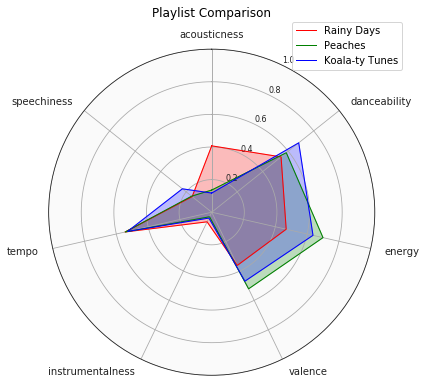

In [109]:
# manually inspect all of the values to determine whether the median or mean is a better metric to plot
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    

labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
num_vars = len(labels)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each playlist on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), 
              np.median(plists[playlist]['speechiness'])]
    # tempo values typically range from 50-220, so I divided by 220 to get a number between 0 and 1
    values[-2] = values[-2]/220
    # speechiness values values are highly concentrated between 0 and 0.25-ish, so I multiplied by 4. Adjust this if needed
    values[-1] = values[-1]*4
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each additional playlist to the chart.
add_to_radar('Rainy Days', 'red')
add_to_radar('Peaches', 'green')
add_to_radar('Koala-ty Tunes', 'blue')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

#Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

fig.savefig('playlist_comp_2.png')

In [184]:
moods_df = pd.DataFrame(plists)
moods_df.head(10)

,Rainy Days,Peaches,Koala-ty Tunes
acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,...","[0.936, 0.882, 0.0972, 0.239, 0.0634, 0.391, 0...","[0.0934, 0.00989, 0.0164, 0.0956, 0.771, 0.262..."
danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5...","[0.499, 0.592, 0.699, 0.664, 0.476, 0.352, 0.3...","[0.567, 0.322, 0.445, 0.708, 0.426, 0.753, 0.7..."
energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33...","[0.159, 0.416, 0.601, 0.76, 0.619, 0.414, 0.43...","[0.913, 0.769, 0.662, 0.648, 0.408, 0.75, 0.74..."
instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0...","[0.000565, 0.000586, 1.17e-05, 2.32e-06, 0.000...","[0.000124, 0, 0, 0, 7.88e-06, 0.00902, 0.395, ..."
liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0...","[0.118, 0.112, 0.562, 0.12, 0.258, 0.185, 0.13...","[0.114, 0.185, 0.219, 0.134, 0.394, 0.0928, 0...."
loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,...","[-16.154, -9.794, -6.48, -4.4, -7.221, -6.6, -...","[-6.471, -5.858, -4.802, -5.626, -9.419, -6.65..."
name,"[Autumn Leaves - Deluxe Edition, I'm Not The O...","[The Girl, Bloom - Bonus Track, Sober, Talk Is...","[Nice For What, Kick On, Alone (Feat. Big Sean..."
popularity,[],[],[]
speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557...","[0.0337, 0.0246, 0.0304, 0.258, 0.0398, 0.0254...","[0.0736, 0.0371, 0.181, 0.0449, 0.0524, 0.0345..."
tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00...","[77.691, 96.002, 98.04, 139.999, 117.113, 60.0...","[93.35, 144.48, 200.04, 143.955, 76.309, 117.9..."


In [185]:
chill_df = moods_df['Rainy Days']
cheerful_df = moods_df['Peaches']
energetic_df = moods_df['Koala-ty Tunes']

In [186]:
# chill_df = chill_df.to_frame()
# cheerful_df = cheerful_df.to_frame()
# energetic_df = energetic_df.to_frame()

In [187]:
chill_df = pd.DataFrame(chill_df)
chill_df

,Rainy Days
acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,..."
danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5..."
energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33..."
instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0..."
liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0..."
loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,..."
name,"[Autumn Leaves - Deluxe Edition, I'm Not The O..."
popularity,[]
speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557..."
tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00..."


In [188]:
chill_df.reset_index(level=0, inplace=True)
chill_df

,index,Rainy Days
0,acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,..."
1,danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5..."
2,energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33..."
3,instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0..."
4,liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0..."
5,loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,..."
6,name,"[Autumn Leaves - Deluxe Edition, I'm Not The O..."
7,popularity,[]
8,speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557..."
9,tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00..."


In [189]:
df2 = pd.DataFrame(chill_df)
print (df2)

               index                                         Rainy Days
0       acousticness  [0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,...
1       danceability  [0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5...
2             energy  [0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33...
3   instrumentalness  [1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0...
4           liveness  [0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0...
5           loudness  [-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,...
6               name  [Autumn Leaves - Deluxe Edition, I'm Not The O...
7         popularity                                                 []
8        speechiness  [0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557...
9              tempo  [89.013, 81.329, 119.7, 120.017, 118.06, 92.00...
10         track uri  [spotify:track:7iBSkXB0pTvZasOLf0Qxk9, spotify...
11           valence  [0.431, 0.474, 0.836, 0.65, 0.427, 0.8, 0.395,...


In [190]:
df3 = pd.DataFrame(df2['Rainy Days'].values.tolist())
print (df3)

                                      0   \
0                                  0.892   
1                                  0.555   
2                                  0.257   
3                               1.42e-06   
4                                  0.124   
5                                -12.637   
6         Autumn Leaves - Deluxe Edition   
7                                   None   
8                                 0.0299   
9                                 89.013   
10  spotify:track:7iBSkXB0pTvZasOLf0Qxk9   
11                                 0.431   

                                      1   \
0                                  0.562   
1                                  0.515   
2                                  0.494   
3                               1.82e-05   
4                                 0.0771   
5                                  -5.78   
6                   I'm Not The Only One   
7                                   None   
8                              

In [191]:
chill_df = df3.T
chill_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.892,0.555,0.257,1.42e-06,0.124,-12.637,Autumn Leaves - Deluxe Edition,None,0.0299,89.013,spotify:track:7iBSkXB0pTvZasOLf0Qxk9,0.431
1,0.562,0.515,0.494,1.82e-05,0.0771,-5.78,I'm Not The Only One,None,0.0416,81.329,spotify:track:4JKDi7xPPKkNAeG8XwBy6h,0.474
2,0.0492,0.755,0.553,0.00607,0.0646,-9.449,If I Ever Feel Better,None,0.107,119.7,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,0.836
3,0.00448,0.621,0.853,0.0012,0.236,-6.537,Electric Love,None,0.0615,120.017,spotify:track:0zulYs8vHhhN0hl8wvYgdv,0.65
4,0.68,0.558,0.47,0.914,0.532,-5.5,lovers’ carvings,None,0.0316,118.06,spotify:track:3JeT6Xcv6MlEHHylk8SKQ1,0.427


In [192]:
chill_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(chill_df.columns)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


In [193]:
chill_df = chill_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
chill_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.892,0.555,0.257,0.124,-12.637,Autumn Leaves - Deluxe Edition,0.0299,89.013,0.431
1,0.562,0.515,0.494,0.0771,-5.78,I'm Not The Only One,0.0416,81.329,0.474
2,0.0492,0.755,0.553,0.0646,-9.449,If I Ever Feel Better,0.107,119.7,0.836
3,0.00448,0.621,0.853,0.236,-6.537,Electric Love,0.0615,120.017,0.65
4,0.68,0.558,0.47,0.532,-5.5,lovers’ carvings,0.0316,118.06,0.427


In [194]:
chill_df  = chill_df [['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
chill_df .head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Autumn Leaves - Deluxe Edition,0.892,0.555,0.257,0.124,-12.637,0.0299,89.013,0.431
1,I'm Not The Only One,0.562,0.515,0.494,0.0771,-5.78,0.0416,81.329,0.474
2,If I Ever Feel Better,0.0492,0.755,0.553,0.0646,-9.449,0.107,119.7,0.836
3,Electric Love,0.00448,0.621,0.853,0.236,-6.537,0.0615,120.017,0.65
4,lovers’ carvings,0.68,0.558,0.47,0.532,-5.5,0.0316,118.06,0.427


In [195]:
cheerful_df = pd.DataFrame(cheerful_df)
cheerful_df.reset_index(level=0, inplace=True)
df2 = pd.DataFrame(cheerful_df)
df3 = pd.DataFrame(df2['Peaches'].values.tolist())
cheerful_df = df3.T
cheerful_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
cheerful_df = cheerful_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
cheerful_df = cheerful_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
cheerful_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,The Girl,0.936,0.499,0.159,0.118,-16.154,0.0337,77.691,0.303
1,Bloom - Bonus Track,0.882,0.592,0.416,0.112,-9.794,0.0246,96.002,0.417
2,Sober,0.0972,0.699,0.601,0.562,-6.48,0.0304,98.04,0.434
3,Talk Is Cheap,0.239,0.664,0.76,0.12,-4.4,0.258,139.999,0.605
4,Back Down South,0.0634,0.476,0.619,0.258,-7.221,0.0398,117.113,0.154


In [196]:
energetic_df = pd.DataFrame(energetic_df)
energetic_df.reset_index(level=0, inplace=True)
df2 = pd.DataFrame(energetic_df)
df3 = pd.DataFrame(df2['Koala-ty Tunes'].values.tolist())
energetic_df = df3.T
energetic_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
energetic_df = energetic_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
energetic_df = energetic_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
energetic_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Nice For What,0.0934,0.567,0.913,0.114,-6.471,0.0736,93.35,0.792
1,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.48,0.508
2,Alone (Feat. Big Sean & Stefflon Don),0.0164,0.445,0.662,0.219,-4.802,0.181,200.04,0.479
3,Love Lies (with Normani),0.0956,0.708,0.648,0.134,-5.626,0.0449,143.955,0.338
4,Paris in the Rain,0.771,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
track           100 non-null object
acousticness    100 non-null object
danceability    100 non-null object
energy          100 non-null object
liveness        100 non-null object
loudness        100 non-null object
speechiness     100 non-null object
tempo           100 non-null object
valence         100 non-null object
dtypes: object(9)
memory usage: 7.1+ KB


In [181]:
songs_df = pd.concat([chill_df, cheerful_df, energetic_df], axis=0)
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 99
Data columns (total 9 columns):
track           300 non-null object
acousticness    300 non-null object
danceability    300 non-null object
energy          300 non-null object
liveness        300 non-null object
loudness        300 non-null object
speechiness     300 non-null object
tempo           300 non-null object
valence         300 non-null object
dtypes: object(9)
memory usage: 23.4+ KB


In [198]:
songs_df.to_csv('mysongsdf.csv', index=False)